In [1]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from nltk import word_tokenize
from collections import Counter
from string import punctuation
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import cluster
from sklearn.metrics.pairwise import cosine_similarity
matplotlib.rcParams.update({'figure.autolayout': True})

In [2]:
df = pd.read_csv('HC.csv')

In [3]:
df['historia_clinica'] = df['historia_clinica'].str.replace(',',' ')
df['historia_clinica']= df['historia_clinica'].str.replace(' S. ',' sindrome ')
df['historia_clinica'] = df['historia_clinica'].str.replace('.',' ')

In [4]:
df['historia_clinica'] = df['historia_clinica'].str.lower().str.replace('años','anos')
df['historia_clinica'] = df['historia_clinica'].str.lower().str.replace('mama','seno')

In [5]:
remove_words = ['paciente','pacientes','gen','secuenciacion','molecular','tipo','mas','de']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
df['historia_clinica'] = df['historia_clinica'].str.replace(pat,' ')

In [6]:
df['historia_clinica']

0        con cuadro clinico compatible con crisis feb...
1      sospecha craneosinostosis por abombamiento fro...
2      tumor maligno   retina    sin riesgo cardiovas...
3        con crisis compulsivas  con crisis donde hub...
4      prueba para el complejo   esclerosis tuberosa ...
5      sindrome   hipermovilidad  miopia degenerativa...
6                                      fibrosis quistica
7      distrofia muscular progresiva en estudio duche...
8        con evidencia   retinoblatoma bilateral  con...
9                   agamaglobulinemia hereditaria bruton
10     sospecha   enfermedad rara  con retraso del ne...
11                                      cancer   seno t3
12                     estudio     esclerosis tuberosa\n
13     sospecha   pseudoacondroplasia    con acortami...
14       con antecedentes   enfermedad metabolica no ...
15                         epilepsia mioclonica severa\n
16       con 2 hijos fallecidos en periodo neonatal  ...
17     baja talla por deficienc

In [7]:
df = df.rename(columns={'historia_clinica': 'HC'})

In [8]:
from nltk.corpus import stopwords
stop = stopwords.words('spanish')
q = r'\b(?:{})\b'.format('|'.join(stop).encode('utf-8'))
df['HC'] = df['HC'].str.replace(q,' ')

In [9]:
df['HC']

0          cuadro clinico compatible   crisis febrile...
1      sospecha craneosinostosis   abombamiento front...
2      tumor maligno   retina      riesgo cardiovascu...
3          crisis compulsivas    crisis     supravers...
4      prueba     complejo   esclerosis tuberosa  gen...
5      sindrome   hipermovilidad  miopia degenerativa...
6                                      fibrosis quistica
7      distrofia muscular progresiva   estudio duchen...
8          evidencia   retinoblatoma bilateral    alt...
9                   agamaglobulinemia hereditaria bruton
10     sospecha   enfermedad rara    retraso   neurod...
11                                      cancer   seno t3
12                     estudio     esclerosis tuberosa\n
13     sospecha   pseudoacondroplasia      acortamien...
14         antecedentes   enfermedad metabolica   det...
15                         epilepsia mioclonica severa\n
16         2 hijos fallecidos   periodo neonatal     ...
17     baja talla   deficiencia

In [ ]:
#from nltk.stem.snowball import SnowballStemmer
#stemmer = SnowballStemmer("spanish")
#df['stimming'] = df.HC.map(lambda x: ' '.join([stemmer.stem(y) for y in x.decode('utf-8').split(' ')]))
#df.stimming.head()

In [10]:
df.head()

,id,codigo,sexo,edad,HC
0,1,32244,M,2,cuadro clinico compatible crisis febrile...
1,2,33254,F,0,sospecha craneosinostosis abombamiento front...
2,3,36954,F,0,tumor maligno retina riesgo cardiovascu...
3,4,35227,M,2,crisis compulsivas crisis supravers...
4,5,31156,F,8,prueba complejo esclerosis tuberosa gen...


In [11]:
df1 = df[['id','HC']]

In [12]:
df1.head()

,id,HC
0,1,cuadro clinico compatible crisis febrile...
1,2,sospecha craneosinostosis abombamiento front...
2,3,tumor maligno retina riesgo cardiovascu...
3,4,crisis compulsivas crisis supravers...
4,5,prueba complejo esclerosis tuberosa gen...


In [13]:
df1.to_csv('hc1.csv', index = False, encoding='utf-8')

In [14]:
df2 = pd.read_csv('hc1.csv')

In [15]:
top_N = 30

In [16]:
txt = df1.HC.str.lower().str.replace(r'.', ' ').str.cat(sep= ' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

In [17]:
stopwords = nltk.corpus.stopwords.words('spanish')+ list(punctuation)
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords)
rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Términos', 'Frecuencias']).set_index('Términos')
rslt.head()

/home/jennifer/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  


,Frecuencias
Términos,
seno,66
cancer,62
sindrome,57
sospecha,33
anos,31


In [18]:
frecuencias = rslt.sort_values(by='Frecuencias',ascending=[True])

In [19]:
frecuencias.head()

,Frecuencias
Términos,
requiere,12
derecho,12
manejo,12
retardo,12
1,13


/home/jennifer/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


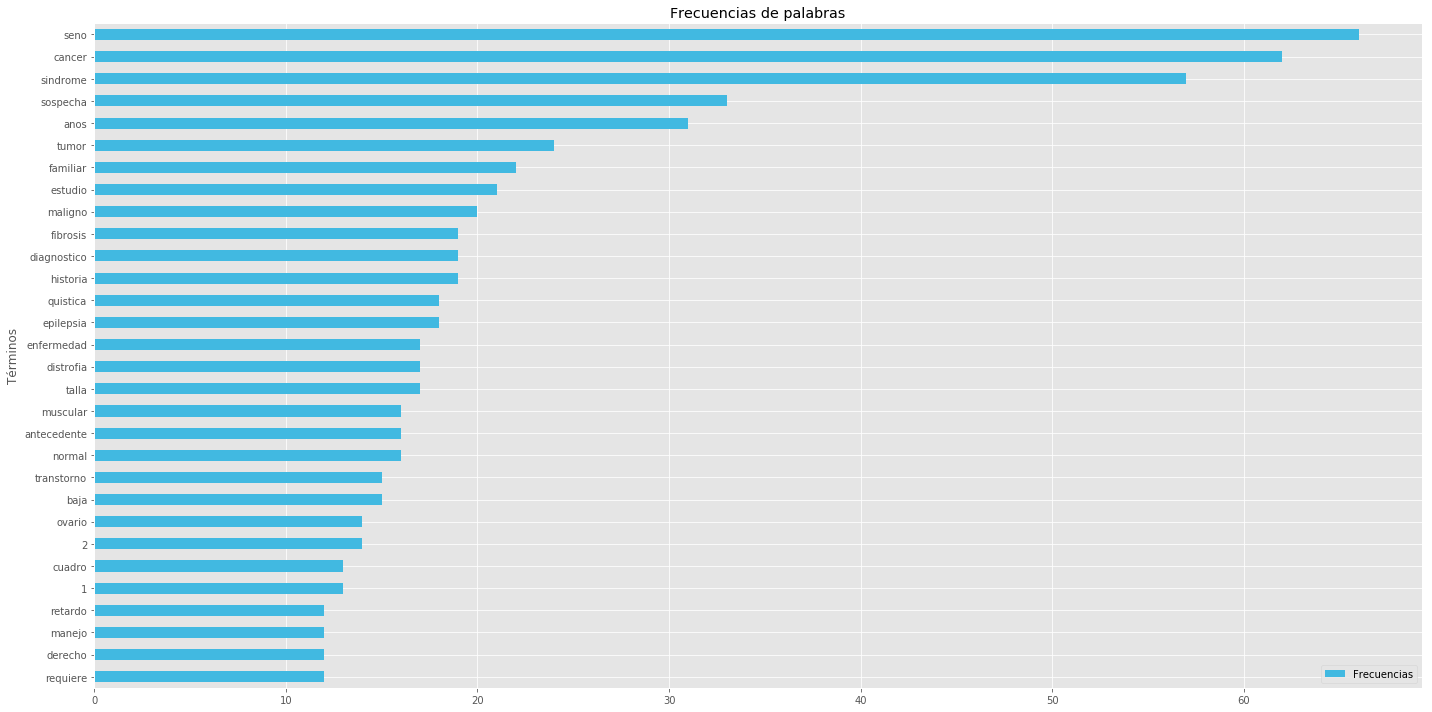

In [20]:
#plt.xkcd()
plot = frecuencias.plot(kind="barh", title = 'Frecuencias de palabras' , color = [('#41b9e1')],figsize=(20, 10));
fig = plot.get_figure();
fig.savefig("frecuecias.png", bbox_inches=0)

In [21]:
idf = pd.read_csv('idffrecuencias1.csv') #calculado con R
del idf['Unnamed: 0']

In [22]:
idf_plot = idf.sum()

In [23]:
idf_plot.head()

canalopatia       13.665780
clinico           45.229816
compatible        27.554810
consentimiento    18.743783
considera         41.966685
dtype: float64

In [24]:
IDF = pd.DataFrame({'Términos':idf_plot.index, 'frecuencias':idf_plot.values})
q = IDF.sort_values(by=['frecuencias'],ascending=[False]).set_index('Términos')
idf_p = q.head(30)
idf_p.head()

,frecuencias
Términos,
seno,168.134194
cancer,160.267675
sindrome,129.863166
anos,100.685753
sospecha,94.996892


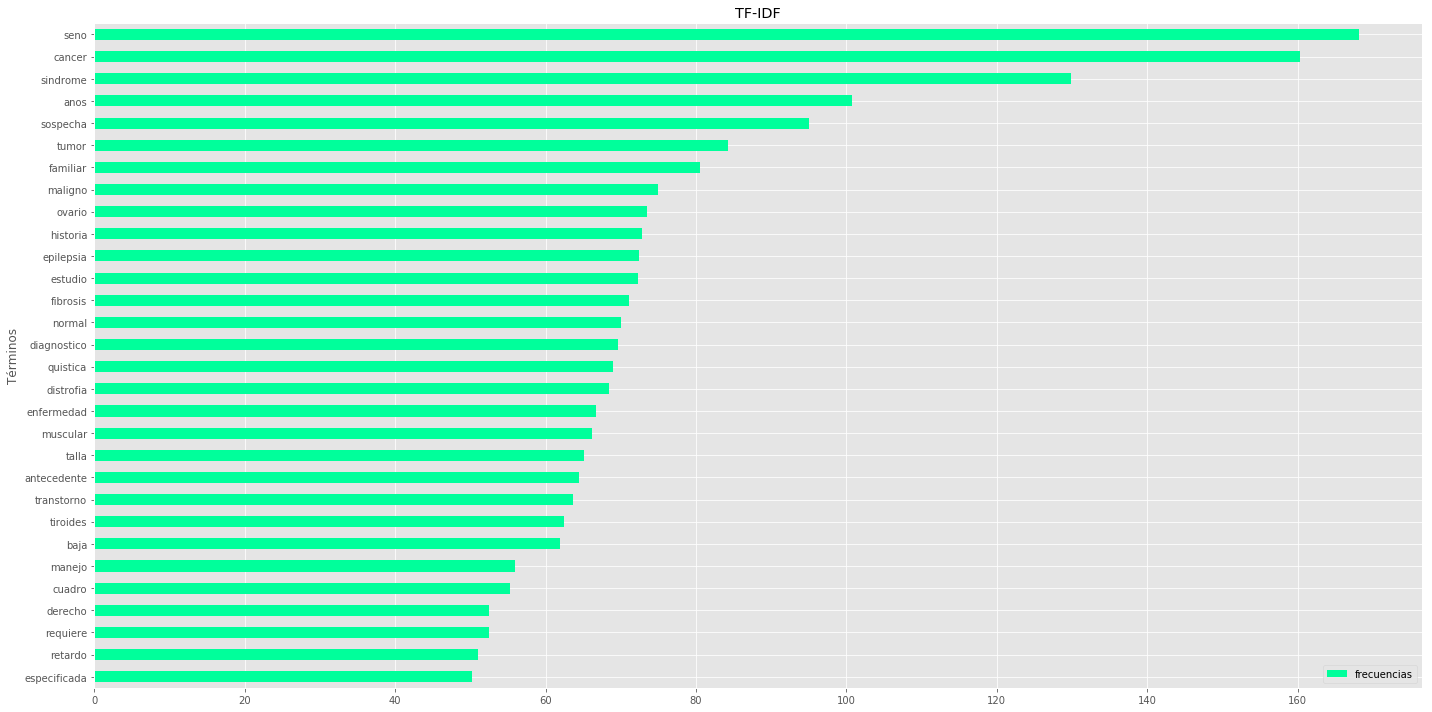

In [25]:
#plt.xkcd()
plot = idf_p.plot(kind="barh", title = 'TF-IDF' , color = [('#00FF9B')],figsize=(20, 10));
fig = plot.get_figure();
plt.gca().invert_yaxis();
fig.savefig("TFIDF1.png",bbox_inches=0)

In [26]:
idf1 = pd.read_csv('idffrecuencias1.csv') #calculado con R

In [27]:
idf1 = idf1.rename(columns={'Unnamed: 0': 'DOC'})
del idf1['DOC']
idf1.head()

,canalopatia,clinico,compatible,consentimiento,considera,crisis,cuadro,dravet,febriles,informado,...,prolapso,raiz,scrore,oesteogenesis,scna1,poliposico,querequirio,quimioterapia,resscion,sigmoide
0,6.83289,5.025535,5.510962,6.247928,4.662965,5.025535,4.247928,6.83289,6.247928,6.247928,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.000000,0.000000,6.247928,0.000000,0.000000,0.000000,0.00000,0.000000,6.247928,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.000000,0.000000,6.247928,0.000000,0.000000,0.000000,0.00000,0.000000,6.247928,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.000000,0.000000,0.000000,0.000000,10.051070,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
mean_idf = idf1.mean(0)

In [29]:
mean_idf.head()

canalopatia       0.059938
clinico           0.198376
compatible        0.120854
consentimiento    0.082210
considera         0.184064
dtype: float64

In [30]:
resta = idf1 - mean_idf #Normalización entre cero y uno. Distancia de la media


In [31]:
norma = np.sqrt(np.diag(np.dot(idf1.T, idf1))) #calculo de la norma

Se calcula a partir de multiplicar la matriz transpuesta por si misma, esto proporciona una matriz cuadrada cuya diagonal esta formada por las normas al cuadrado, la raiz cuadrada de esta diagonal corresponde al vector de las normas de los campos de la matriz.

In [32]:
normalizado = idf1/norma

In [33]:
normalizado

,canalopatia,clinico,compatible,consentimiento,considera,crisis,cuadro,dravet,febriles,informado,...,prolapso,raiz,scrore,oesteogenesis,scna1,poliposico,querequirio,quimioterapia,resscion,sigmoide
0,0.707107,0.27735,0.447214,0.57735,0.333333,0.27735,0.258199,0.707107,0.57735,0.57735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.00000,0.000000,0.57735,0.000000,0.00000,0.000000,0.000000,0.00000,0.57735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.00000,0.000000,0.57735,0.000000,0.00000,0.000000,0.000000,0.00000,0.57735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.00000,0.000000,0.00000,0.000000,0.55470,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
normalizado.to_csv('normalizado1.csv', index= True)

In [36]:
comprobacion = np.sqrt(np.diag(np.dot(normalizado.T, normalizado))) # Comprobacion de la normlizacion......
comprobacion

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [37]:
labels = list(range(1, 229))

In [38]:
normalizado['DOC'] = labels

In [41]:
normalizado.set_index('DOC')

,canalopatia,clinico,compatible,consentimiento,considera,crisis,cuadro,dravet,febriles,informado,...,prolapso,raiz,scrore,oesteogenesis,scna1,poliposico,querequirio,quimioterapia,resscion,sigmoide
DOC,,,,,,,,,,,,,,,,,,,,,
1,0.707107,0.27735,0.447214,0.57735,0.333333,0.27735,0.258199,0.707107,0.57735,0.57735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.00000,0.000000,0.57735,0.000000,0.00000,0.000000,0.000000,0.00000,0.57735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.00000,0.000000,0.57735,0.000000,0.00000,0.000000,0.000000,0.00000,0.57735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.00000,0.000000,0.00000,0.000000,0.55470,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#matrix = normalizado.as_matrix()
for n_clusters in range(2,11):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters,n_init=10)
    kmeans.fit(normalizado)
    clusters = kmeans.predict(normalizado)
    silhouette_avg = silhouette_score(normalizado, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

('For n_clusters =', 2, 'The average silhouette_score is :', 0.61979828557578664)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.57738011130635414)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.55271179988691366)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.53395410318391601)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.51837723331621954)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.50461490631770023)
('For n_clusters =', 8, 'The average silhouette_score is :', 0.4942604090671715)
('For n_clusters =', 9, 'The average silhouette_score is :', 0.48119913554808919)
('For n_clusters =', 10, 'The average silhouette_score is :', 0.4700379870886589)


In [59]:
cluster_range = range(2, 11)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(normalizado)
    cluster_errors.append( clusters.inertia_ )

In [60]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,cluster_errors,num_clusters
0,248658.061033,2
1,111451.407305,3
2,63421.648097,4
3,41220.995104,5
4,29177.841668,6
5,21843.264588,7
6,17122.682809,8
7,13945.504252,9
8,11617.605045,10


In [61]:
clusters_df["cluster_errors"] = clusters_df["cluster_errors"]/10000
clusters_df

,cluster_errors,num_clusters
0,24.865806,2
1,11.145141,3
2,6.342165,4
3,4.122100,5
4,2.917784,6
5,2.184326,7
6,1.712268,8
7,1.394550,9
8,1.161761,10


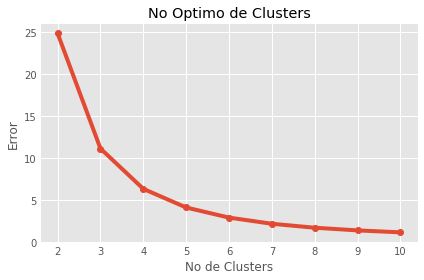

In [119]:
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
fig = plt.figure()
plt.ylabel('Error')
plt.xlabel('No de Clusters')
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")
plt.title('No Optimo de Clusters')
fig.savefig('Clusters.png', dpi=fig.dpi)

In [147]:
n_clusters = 5
silhouette_avg = -1
while silhouette_avg <  0.5:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
    kmeans.fit(normalizado)
    clusters = kmeans.predict(normalizado)
    silhouette_avg = silhouette_score(normalizado, clusters)
    
    #km = kmodes.KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0
    #clusters = km.fit_predict(matrix)
    #silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

('For n_clusters =', 5, 'The average silhouette_score is :', 0.53395410318391601)


In [148]:
cluster_map = pd.DataFrame()
cluster_map['DOC'] = normalizado.index.values
cluster_map['cluster'] = kmeans.labels_
cluster_map['hc'] = df1['HC']
cluster_map

,DOC,cluster,hc
0,0,4,cuadro clinico compatible crisis febrile...
1,1,4,sospecha craneosinostosis abombamiento front...
2,2,4,tumor maligno retina riesgo cardiovascu...
3,3,4,crisis compulsivas crisis supravers...
4,4,4,prueba complejo esclerosis tuberosa gen...
5,5,4,sindrome hipermovilidad miopia degenerativa...
6,6,4,fibrosis quistica
7,7,4,distrofia muscular progresiva estudio duchen...
8,8,4,evidencia retinoblatoma bilateral alt...
9,9,4,agamaglobulinemia hereditaria bruton


In [160]:
cluster1_1 = cluster_map[cluster_map.cluster == 0]
cluster2_1 = cluster_map[cluster_map.cluster == 1]
cluster3_1 = cluster_map[cluster_map.cluster == 2]
cluster4_1 = cluster_map[cluster_map.cluster == 3]
cluster5_1 = cluster_map[cluster_map.cluster == 4]
cluster5_1.head()

,DOC,cluster,hc
0,0,4,cuadro clinico compatible crisis febrile...
1,1,4,sospecha craneosinostosis abombamiento front...
2,2,4,tumor maligno retina riesgo cardiovascu...
3,3,4,crisis compulsivas crisis supravers...
4,4,4,prueba complejo esclerosis tuberosa gen...


In [ ]:
#cluster_map['hc'] = df1['stimming']
#cluster_map.head()

In [150]:
cluster1 = cluster1_1['DOC'].values.tolist()
c1 = cluster_map[cluster_map['DOC'].isin(cluster1)]
c1.to_csv('cluster1.csv', index = False)
c1.head()

,DOC,cluster,hc
92,92,0,historia familiar tumor maligno seno ...
93,93,0,sindrome nefrotico realizo depuracion ...
94,94,0,sn1a canalapatia sodio
95,95,0,displasias esqueleticas
96,96,0,sindrome mielodisplasico recien nacido preter...


In [151]:
cluster2 = cluster2_1['DOC'].values.tolist()
c2 = cluster_map[cluster_map['DOC'].isin(cluster2)]
c2.to_csv('cluster2.csv', index = False)
c2.head()

,DOC,cluster,hc
46,46,1,seguimiento neuropediatria restraso m...
47,47,1,manchas cafe leche sospecha neurofibromat...
48,48,1,sospecha enfermedad jarabe arce r...
49,49,1,antecedentes cancer seno 5 hermanas can...
50,50,1,tumor seno derecho carcinoma infiltra...


In [152]:
cluster3 = cluster3_1['DOC'].values.tolist()
c3 = cluster_map[cluster_map['DOC'].isin(cluster3)]
c3.to_csv('cluster3.csv', index = False)
c3.head()

,DOC,cluster,hc
184,184,2,anemia hipocromatuca microcitica antecendete ...
185,185,2,sindrome ehlers danlos asintomatica habia...
186,186,2,secuencion brca1 brca2 delecciones dupli...
187,187,2,diagnostico clinico homocistinuria disti...
188,188,2,esferocitosis hereditaria anemia especi...


In [153]:
cluster4 = cluster4_1['DOC'].values.tolist()
c4 = cluster_map[cluster_map['DOC'].isin(cluster4)]
c4.to_csv('cluster4.csv', index = False )
c4.head()

,DOC,cluster,hc
139,139,3,11 anos producto relacion consanguinea ...
140,140,3,transtorno conducta sociablem transtorno ...
141,141,3,gastritis cronica tumor maligno seno cancer...
142,142,3,esclerosis neromuscular distrofia muscular ...
143,143,3,acidosis tubular renal distal ademas falla ...


In [161]:
cluster5 = cluster5_1['DOC'].values.tolist()
c5 = cluster_map[cluster_map['DOC'].isin(cluster5)]
c5.to_csv('cluster5.csv', index = False)
c5.head()

,DOC,cluster,hc
0,0,4,cuadro clinico compatible crisis febrile...
1,1,4,sospecha craneosinostosis abombamiento front...
2,2,4,tumor maligno retina riesgo cardiovascu...
3,3,4,crisis compulsivas crisis supravers...
4,4,4,prueba complejo esclerosis tuberosa gen...


In [162]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.spectral(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

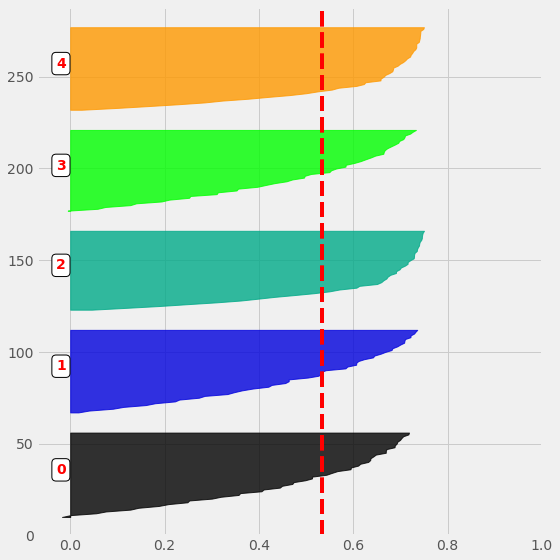

In [163]:
#plt.xkcd()
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(normalizado, clusters)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.07, 1], len(normalizado), sample_silhouette_values, clusters)

In [164]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, kmeans.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(normalizado, kmeans.labels_, sample_size=10000))


Homogeneity: 0.296
Completeness: 1.000
V-measure: 0.457
Adjusted Rand-Index: 0.000
Silhouette Coefficient: 0.534


In [84]:
dist = cosine_similarity(normalizado)

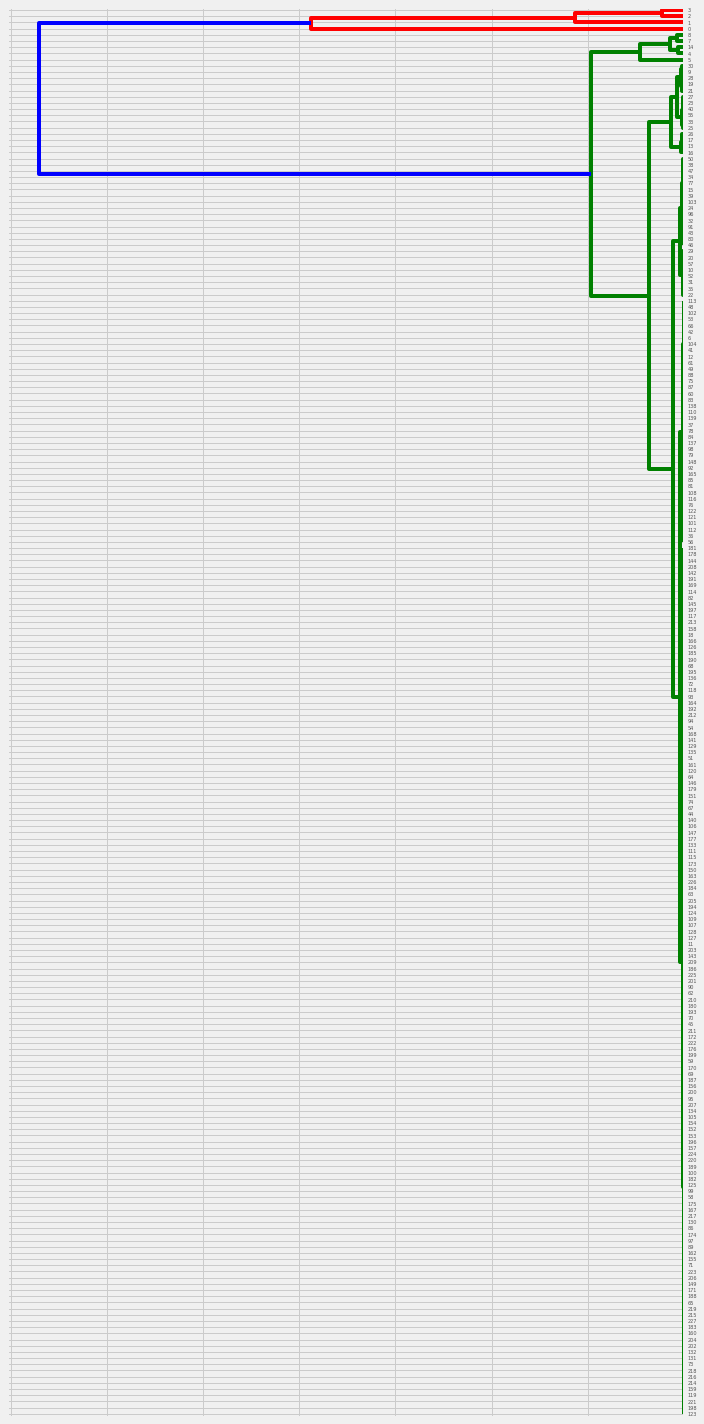

In [85]:
from scipy.cluster.hierarchy import ward, dendrogram
dist = cosine_similarity(normalizado)
linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances\n",
fig, ax = plt.subplots(figsize=(10, 20)) # set size\n",
ax = dendrogram(linkage_matrix, orientation="left");
plt.tick_params(axis= 'x',          # changes apply to the x-axis\n",
                which='both',      # both major and minor ticks are affected\n",
                bottom='off',      # ticks along the bottom edge are off\n",
                top='off',         # ticks along the top edge are off\n",
                labelbottom='off'),
plt.tight_layout() #show plot with tight layout\n",
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters"